## Exploratory data analisys and Data Preparation
### Missing Values

1. Import libraries

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

2. Dataset importing (local and drive modes)

In [71]:
# Local importing
energy_dataframe = pd.read_excel('Energy _data (1).xlsx') # Comment if you want to load the file from repo
# Web importing
# energy_dataframe = pd.read_excel('https://github.com/GianRojas/CrystalTEC-EnergyData/raw/main/Energy%20_data%20(1).xlsx')
energy_dataframe

,Hour,energy_consumpt_2001,energy_consumpt_2002,full_temp_2001,full_humid_2001,full_temp_2002,full_humid_2002
0,1,631.623161,835.021567,-0.400000,64.000000,7.600000,82.000000
1,2,534.397104,711.875374,-0.733333,65.333333,7.733333,78.666667
2,3,453.538784,592.673215,-1.066667,66.666667,7.866667,75.333333
3,4,400.699718,526.997961,-1.400000,68.000000,8.000000,72.000000
4,5,378.171092,497.588642,-1.666667,60.333333,8.333333,69.666667
...,...,...,...,...,...,...,...
8779,8780,950.369306,0.000000,3.333333,64.000000,NaN,NaN
8780,8781,880.138770,0.000000,2.666667,68.000000,NaN,NaN
8781,8782,792.754026,0.000000,2.000000,72.000000,NaN,NaN
8782,8783,740.446668,0.000000,1.333333,76.000000,NaN,NaN


3. Split dataframe by year

In [72]:
# 2001 dataframe
df_2001 = energy_dataframe[['Hour','energy_consumpt_2001','full_temp_2001','full_humid_2001']]
df_2001 = df_2001.rename({'energy_consumpt_2001':'energy_consumpt', 'full_temp_2001':'full_temp', 'full_humid_2001':'full_humid'}, axis=1)
df_2001.insert(loc=0, column="year", value='2001')

# 2002 dataframe
df_2002 = energy_dataframe[['Hour','energy_consumpt_2002','full_temp_2002','full_humid_2002']]
df_2002 = df_2002.rename({'energy_consumpt_2002':'energy_consumpt', 'full_temp_2002':'full_temp', 'full_humid_2002':'full_humid'}, axis=1)
df_2002.insert(loc=0, column="year", value='2002')
df_2002

,year,Hour,energy_consumpt,full_temp,full_humid
0,2002,1,835.021567,7.600000,82.000000
1,2002,2,711.875374,7.733333,78.666667
2,2002,3,592.673215,7.866667,75.333333
3,2002,4,526.997961,8.000000,72.000000
4,2002,5,497.588642,8.333333,69.666667
...,...,...,...,...,...
8779,2002,8780,0.000000,NaN,NaN
8780,2002,8781,0.000000,NaN,NaN
8781,2002,8782,0.000000,NaN,NaN
8782,2002,8783,0.000000,NaN,NaN


4. Compare count of measures

In [73]:
print(f"df_2001 rows: {df_2001.Hour.count()}\ndf_2002 rows: {df_2002.Hour.count()}")

df_2001 rows: 8784
df_2002 rows: 8784


theres is more measures than hours in a normal year (8760)  
Take a look on last 24 values

In [74]:
df_2001.compare(df_2002, align_axis=0).tail(24)

year  energy_consumpt  full_temp  full_humid
8772 self   2001       843.230570   8.800000   35.000000
     other  2002         0.000000        NaN         NaN
8773 self   2001       862.376112   9.866667   33.666667
     other  2002         0.000000        NaN         NaN
8774 self   2001       885.214790  10.933333   32.333333
     other  2002         0.000000        NaN         NaN
8775 self   2001       904.754785  12.000000   31.000000
     other  2002         0.000000        NaN         NaN
8776 self   2001       960.265378   9.333333   40.666667
     other  2002         0.000000        NaN         NaN
8777 self   2001      1008.915444   6.666667   50.333333
     other  2002         0.000000        NaN         NaN
8778 self   2001       994.170651   4.000000   60.000000
     other  2002         0.000000        NaN         NaN
8779 self   2001       950.369306   3.333333   64.000000
     other  2002         0.000000        NaN         NaN
8780 self   2001       880.138770   2.666667   68.000000
     other  2002         0.000000        NaN         NaN
8781 self   2001       792.754026   2.000000   72.000000
     other  2002         0.000000        NaN         NaN
8782 self   2001       740.446668   1.333333   76.000000
     other  2002         0.000000        NaN         NaN
8783 self   2001       706.176769   0.666667   80.000000
     other  2002         0.000000        NaN         NaN

4. Clean data2002 dataframe

last 24 items of 2002 data are blank measures for humid and temp. zeros in **energy_consumpt**

In [75]:
df_2002.tail(24)

,year,Hour,energy_consumpt,full_temp,full_humid
8760,2002,8761,0.0,NaN,NaN
8761,2002,8762,0.0,NaN,NaN
8762,2002,8763,0.0,NaN,NaN
8763,2002,8764,0.0,NaN,NaN
8764,2002,8765,0.0,NaN,NaN
8765,2002,8766,0.0,NaN,NaN
8766,2002,8767,0.0,NaN,NaN
8767,2002,8768,0.0,NaN,NaN
8768,2002,8769,0.0,NaN,NaN
8769,2002,8770,0.0,NaN,NaN


If we assume that the variable **energy_consumpt** is dependent on the variables **full_temp** and **full_humid** then we will omit these last 24 values

In [76]:
df_2002 = df_2002.iloc[:-24]

now the number of values in **data2002** is exact to the total hours of a year

In [77]:
df_2002['Hour'].count() 

8760

Last 24 values of 2001 it semms valid measures so lets keep them.

6. Merging dataframes

In [78]:
df2=pd.concat([df_2001, df_2002], axis=0)
df2

,year,Hour,energy_consumpt,full_temp,full_humid
0,2001,1,631.623161,-0.400000,64.000000
1,2001,2,534.397104,-0.733333,65.333333
2,2001,3,453.538784,-1.066667,66.666667
3,2001,4,400.699718,-1.400000,68.000000
4,2001,5,378.171092,-1.666667,60.333333
...,...,...,...,...,...
8755,2002,8756,1295.271939,5.933333,62.000000
8756,2002,8757,1181.771718,5.066667,67.000000
8757,2002,8758,1051.278230,4.200000,72.000000
8758,2002,8759,983.742983,3.333333,77.000000


7. Check for inner NA values

In [79]:
df2.isna().sum()

year                0
Hour                0
energy_consumpt    34
full_temp           0
full_humid          0
dtype: int64


6. Visual analisys   
the values for 5 first days show us a pattern 

<AxesSubplot:xlabel='Hour', ylabel='energy_consumpt'>

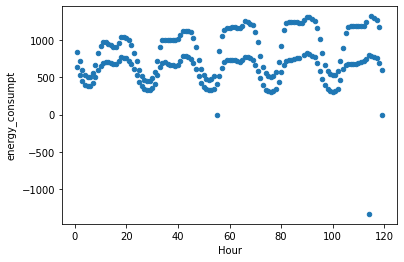

In [80]:
df2.query('Hour<120').plot.scatter(x='Hour', y='energy_consumpt')

Lets zoom near a missing value

<AxesSubplot:xlabel='Hour', ylabel='energy_consumpt'>

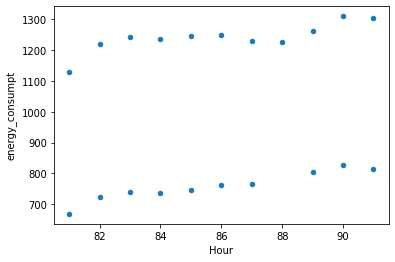

In [81]:
df2.query('80<Hour<92').plot.scatter(x='Hour', y='energy_consumpt')

each point in this pattern would must be bettwen its left neighbor and right neighbor  
we can use linear interpolation to fill these missing values (like Hour=88)

In [82]:
df2['energy_consumpt'] = df2['energy_consumpt'].interpolate()
df2.isna().sum()

year               0
Hour               0
energy_consumpt    0
full_temp          0
full_humid         0
dtype: int64

Now the missing values are filled with relevant data

### Handling Outliers
lets see a **energy_consumpt** plot

<AxesSubplot:xlabel='Hour', ylabel='energy_consumpt'>

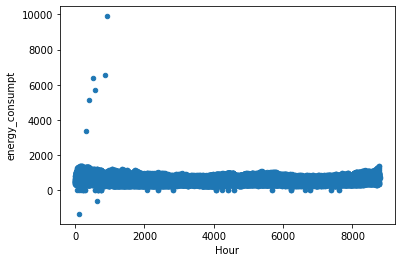

In [83]:
df2.plot.scatter(x='Hour', y='energy_consumpt')

It seems there is some outliers. we'll analize data with boxplot

<function matplotlib.pyplot.show(close=None, block=None)>

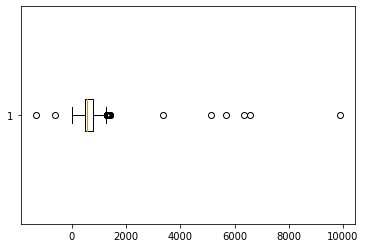

In [84]:
plt.boxplot(df2['energy_consumpt'], vert=False)
plt.show

In [85]:
df2.describe()

,Hour,energy_consumpt,full_temp,full_humid
count,17544.000000,17544.000000,17544.000000,17544.000000
mean,4386.508208,627.405695,17.899761,61.839318
std,2532.344653,248.930651,7.880001,18.972915
min,1.000000,-1332.918388,-3.200000,3.000000
25%,2193.750000,472.217562,12.000000,47.000000
50%,4386.500000,574.457488,18.000000,64.666667
75%,6579.250000,793.752332,23.933333,77.333333
max,8784.000000,9896.924643,41.000000,100.000000


All values greater than 3rd quarter and less than 1st quarter are outliers but there is some values too close of upper whisker   

Setting whiskers...

In [86]:
#1rst Quartile
Q1 = df2['energy_consumpt'].quantile(0.25)
#3rd quantile
Q3 = df2['energy_consumpt'].quantile(0.75)
#InterQuartile Range
IQR = Q3 - Q1
#Lower whisker
LW = Q1 - IQR*1.2
#Upper whisker - 2.2 factor chosen to exclude values > 1009.69 on energy_consumption
UW = Q3 + IQR*1.2
print(f"Lower whisker:{LW} \nUpper whisker: {UW}")

Lower whisker:86.37583859433613 
Upper whisker: 1179.594055794554


In [87]:
outliers_location = (df2['energy_consumpt']<LW) | (df2['energy_consumpt']>UW)
print(f"There are {outliers_location.sum()} outliers detected")

There are 248 outliers detected


In [88]:
outliers = df2[outliers_location].sort_values('energy_consumpt')
print("Outliers Description:")
outliers

Outliers Description:


,year,Hour,energy_consumpt,full_temp,full_humid
113,2002,114,-1332.918388,13.600000,49.666667
638,2001,639,-614.175490,16.933333,43.000000
4419,2002,4420,0.000000,21.400000,74.000000
172,2002,173,0.000000,7.666667,86.666667
280,2002,281,0.000000,13.400000,41.333333
...,...,...,...,...,...
412,2002,413,5120.631318,6.466667,59.333333
576,2002,577,5682.085168,3.000000,60.000000
502,2001,503,6364.455548,3.633333,88.000000
849,2001,850,6560.013773,8.000000,30.000000


In [89]:
# droping outliers
df2 = df2[~outliers_location]
df2['Hour'].count()

17296

<AxesSubplot:xlabel='Hour'>

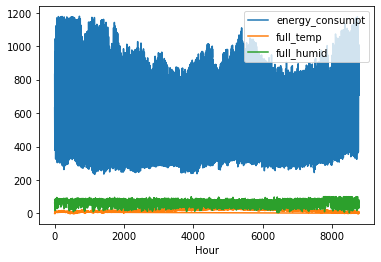

In [91]:
df2.plot('Hour')

Visual analisis does not show us outliers for **full_humid** and **full_temp** variables

## Grouping

### Grouping by day

In [95]:
import math

df3=df2.assign(day_group=0)
df3['day_group'] = df3.apply(lambda row: math.ceil(row.Hour / 24), axis=1)
df3

,year,Hour,energy_consumpt,full_temp,full_humid,day_group
0,2001,1,631.623161,-0.400000,64.000000,1
1,2001,2,534.397104,-0.733333,65.333333,1
2,2001,3,453.538784,-1.066667,66.666667,1
3,2001,4,400.699718,-1.400000,68.000000,1
4,2001,5,378.171092,-1.666667,60.333333,1
...,...,...,...,...,...,...
8748,2002,8749,1146.221034,8.000000,54.000000,365
8749,2002,8750,1155.454385,8.800000,48.000000,365
8757,2002,8758,1051.278230,4.200000,72.000000,365
8758,2002,8759,983.742983,3.333333,77.000000,365


Mean by day

In [96]:
df_dia = df3.groupby(['year', 'day_group']).mean()
df_dia

Hour  energy_consumpt  full_temp  full_humid
year day_group                                                     
2001 1            12.500000       609.008607   3.133333   42.666667
     2            36.500000       586.616228   7.404167   61.791667
     3            60.500000       594.213777   9.491667   85.125000
     4            84.500000       612.099398   9.608333   83.916667
     5           108.500000       592.807758  11.695833   82.125000
...                     ...              ...        ...         ...
2002 361        8652.500000       872.631296   4.791667   70.333333
     362        8675.571429       894.714423   5.638095   73.476190
     363        8698.789474       869.056248   7.000000   81.157895
     364        8722.789474       892.490348   4.915789   78.263158
     365        8746.200000       837.765401   3.284444   83.533333

[731 rows x 4 columns]

## Grouping by week

In [98]:
df4=df2.assign(day_group=0)
df4['week_group'] = df4.apply(lambda row: math.ceil(row.Hour / (24*7)), axis=1)
df4

,year,Hour,energy_consumpt,full_temp,full_humid,day_group,week_group
0,2001,1,631.623161,-0.400000,64.000000,0,1
1,2001,2,534.397104,-0.733333,65.333333,0,1
2,2001,3,453.538784,-1.066667,66.666667,0,1
3,2001,4,400.699718,-1.400000,68.000000,0,1
4,2001,5,378.171092,-1.666667,60.333333,0,1
...,...,...,...,...,...,...,...
8748,2002,8749,1146.221034,8.000000,54.000000,0,53
8749,2002,8750,1155.454385,8.800000,48.000000,0,53
8757,2002,8758,1051.278230,4.200000,72.000000,0,53
8758,2002,8759,983.742983,3.333333,77.000000,0,53


In [101]:
# mean by week

df_week = df4.groupby(['year', 'week_group']).mean()
df_week

Hour  energy_consumpt  full_temp  full_humid  \
year week_group                                                        
2001 1             84.500000       594.031576   9.121429   72.928571   
     2            252.107784       547.057099  11.986028   68.133733   
     3            420.005988       608.236882   4.663273   62.317365   
     4            588.197605       606.616526   6.212375   62.203593   
     5            756.500000       533.342763  12.290476   71.464286   
...                      ...              ...        ...         ...   
2002 49          8148.500000       808.895731   9.504762   71.071429   
     50          8316.500000       834.009269   8.250000   72.565476   
     51          8484.500000       834.976936   9.158333   82.755952   
     52          8647.619355       875.436035   6.767097   70.083871   
     53          8746.200000       837.765401   3.284444   83.533333   

                 day_group  
year week_group             
2001 1                 0.0  
     2                 0.0  
     3                 0.0  
     4                 0.0  
     5                 0.0  
...                    ...  
2002 49                0.0  
     50                0.0  
     51                0.0  
     52                0.0  
     53                0.0  

[106 rows x 5 columns]

## Análisis predictivo

In [103]:
# Preparación de los datos para la predicción caso general
df2

,year,Hour,energy_consumpt,full_temp,full_humid
0,2001,1,631.623161,-0.400000,64.000000
1,2001,2,534.397104,-0.733333,65.333333
2,2001,3,453.538784,-1.066667,66.666667
3,2001,4,400.699718,-1.400000,68.000000
4,2001,5,378.171092,-1.666667,60.333333
...,...,...,...,...,...
8748,2002,8749,1146.221034,8.000000,54.000000
8749,2002,8750,1155.454385,8.800000,48.000000
8757,2002,8758,1051.278230,4.200000,72.000000
8758,2002,8759,983.742983,3.333333,77.000000


In [104]:
# Importamos la librería del modelo de regresión lineal
from sklearn.linear_model import LinearRegression

#Instanciamos el modelo
lr = LinearRegression(fit_intercept=True)

In [105]:
# Preparación de los datos
X = df2.iloc[:, [0,1]].values
y = df2.iloc[:, -1].values

# Importación de la libreria para definir los datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [106]:
# Preparación de los datos
X = df2.iloc[:, [0,1]].values
y = df2.iloc[:, -1].values

# Importación de la libreria para definir los datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [107]:
# # Entrenamiento del modelo
lr.fit(X_train, y_train)

LinearRegression()

In [108]:
# Predicciones con train y test
predictions_train = lr.predict(X_train)
predictions_test = lr.predict(X_test)

In [109]:
predictions_test

array([62.01363983, 61.70160187, 62.35690298, ..., 61.55412585,
       62.07103198, 61.90917159])

In [110]:
# Métricas para comprobar la precisión del modelo
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mean_absolute_error(predictions_train, y_train)
np.sqrt(mean_squared_error(predictions_train, y_train))

mean_absolute_error(predictions_test, y_test)
np.sqrt(mean_squared_error(predictions_test, y_test))

r2_score(predictions_train, y_train)
r2_score(predictions_test, y_test)

#np.min(df_ad['Sales])
#np.max(df_ad['Sales'])

-4093.1122335119503

In [ ]:
mean_absolute_error(predictions_train, y_train)

177.9423870641691

In [ ]:
mean_absolute_error(predictions_test, y_test)

175.17420581706918

In [ ]:
r2_score(predictions_train, y_train)

-13.672210376494375

In [ ]:
r2_score(predictions_test, y_test)

-12.215794037927413

## XGBOOST

In [ ]:
# check xgboost version
import xgboost as xg

In [ ]:
# create an xgboost regression model
model = xg.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [ ]:
# Preparación de los datos
X = df2.iloc[:, [0,1]].values
y = df2.iloc[:, -1].values

# Importación de la libreria para definir los datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, X_test.shape

((14008, 2), (3502, 2))

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from xgboost.sklearn import XGBRegressor
model = XGBRegressor()

In [ ]:
model.fit(X_train, y_train)

[00:01:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

predictions = model.predict(X_test)
predictions[1:10]

array([543.77655, 523.1938 , 713.50146, 510.58746, 631.89044, 696.7837 ,
       496.15262, 755.9282 , 576.67596], dtype=float32)

In [ ]:
X_test[0]

array([ 9.73333333, 84.66666667])

In [ ]:
# Métricas para comprobar la precisión del modelo
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

pred_train = model.predict(X_train)

print(r2_score(y_train, pred_train))

0.1436788175533773
